In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('dataset_Superstore.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           9994 non-null   int64  
 1   Order ID         9994 non-null   object 
 2   Order Date       9994 non-null   object 
 3   Ship Date        9994 non-null   object 
 4   Ship Mode        9994 non-null   object 
 5   Customer ID      9994 non-null   object 
 6   Customer Name    9994 non-null   object 
 7   Customer_no      9994 non-null   int64  
 8   Segment          9994 non-null   object 
 9   Segment_no       9994 non-null   int64  
 10  Country          9994 non-null   object 
 11  City             9994 non-null   object 
 12  State            9994 non-null   object 
 13  State_no         9994 non-null   int64  
 14  Postal Code      9994 non-null   int64  
 15  Region           9994 non-null   object 
 16  Region_no        9994 non-null   int64  
 17  Product ID    

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer_no,Segment,Segment_no,...,Category_no,Sub-Category,Sub-Category_no,Product Name,Product Name_no,Sales,Quantity,Discount,Profit,Returned
0,3783,CA-2017-165204,13/11/2017,16/11/2017,Second Class,MN-17935,Michael Nguyen,1,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
1,7322,CA-2017-167626,03/09/2017,07/09/2017,Standard Class,MY-18295,Muhammed Yedwab,2,Corporate,2,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
2,1709,CA-2017-123491,30/10/2017,05/11/2017,Standard Class,JK-15205,Jamie Kunitz,3,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,7.420,2,0.0,3.7100,True
3,2586,CA-2015-121041,03/11/2015,10/11/2015,Standard Class,CS-12250,Chris Selesnick,4,Corporate,2,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,6.608,2,0.2,2.1476,False
4,356,CA-2016-138520,08/04/2016,13/04/2016,Standard Class,JL-15505,Jeremy Lonsdale,5,Consumer,1,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,8.260,2,0.0,3.7996,False


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [9]:
df.dtypes[['Order Date', 'Ship Date']]


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [10]:
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days


In [11]:
df[['Order ID', 'Order Date', 'Ship Date', 'Delivery Days']].head()


,Order ID,Order Date,Ship Date,Delivery Days
0,CA-2017-165204,2017-11-13,2017-11-16,3
1,CA-2017-167626,2017-09-03,2017-09-07,4
2,CA-2017-123491,2017-10-30,2017-11-05,6
3,CA-2015-121041,2015-11-03,2015-11-10,7
4,CA-2016-138520,2016-04-08,2016-04-13,5


In [12]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month


In [13]:
df[['Order ID', 'Order Date', 'Year', 'Month']].head()


,Order ID,Order Date,Year,Month
0,CA-2017-165204,2017-11-13,2017,11
1,CA-2017-167626,2017-09-03,2017,9
2,CA-2017-123491,2017-10-30,2017,10
3,CA-2015-121041,2015-11-03,2015,11
4,CA-2016-138520,2016-04-08,2016,4


In [14]:
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100


In [15]:
df[['Order ID', 'Sales', 'Profit', 'Profit Margin']].head()


,Order ID,Sales,Profit,Profit Margin
0,CA-2017-165204,8.904,3.3390,37.5
1,CA-2017-167626,8.904,3.3390,37.5
2,CA-2017-123491,7.420,3.7100,50.0
3,CA-2015-121041,6.608,2.1476,32.5
4,CA-2016-138520,8.260,3.7996,46.0


In [16]:
# Category-wise total Sales and Profit
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
print(category_summary)


          Category        Sales       Profit
0        Furniture  741999.7953   18451.2728
1  Office Supplies  719047.0320  122490.8008
2       Technology  836154.0330  145454.9481


In [21]:
region_summary = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
print(region_summary)


    Region        Sales       Profit
0  Central  501239.8908   39706.3625
1     East  678781.2400   91522.7800
2    South  391721.9050   46749.4303
3     West  725457.8245  108418.4489


In [22]:
returned_summary = df[df['Returned']==True].groupby('Category')[['Sales','Profit']].sum().reset_index()
print(returned_summary)


          Category       Sales      Profit
0        Furniture  59219.1749   2341.1187
1  Office Supplies  48576.9290   6893.8960
2       Technology  72708.1740  13997.3468


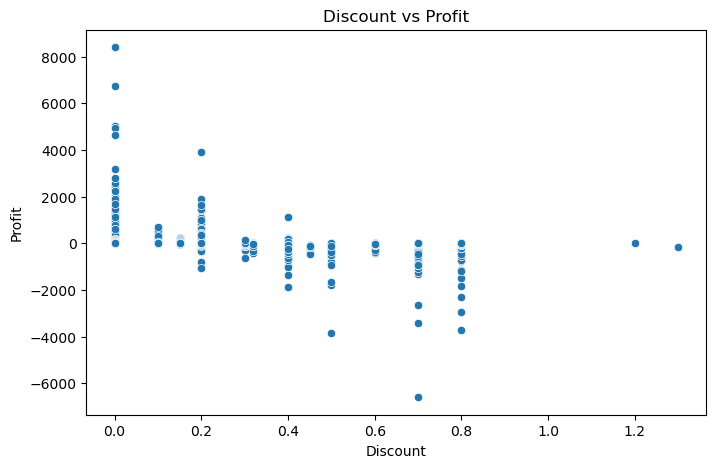

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()


In [24]:
# Sub-Category-wise total Sales and Profit
subcat_summary = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
print(subcat_summary)


   Sub-Category        Sales      Profit
0   Accessories  167380.3180  41936.6357
1    Appliances  107532.1610  18138.0054
2           Art   27118.7920   6527.7870
3       Binders  203412.7330  30221.7633
4     Bookcases  114879.9963  -3472.5560
5        Chairs  328449.1030  26590.1663
6       Copiers  149528.0300  55617.8249
7     Envelopes   16476.4020   6964.1767
8     Fasteners    3024.2800    949.5182
9   Furnishings   91705.1640  13059.1436
10       Labels   12486.3120   5546.2540
11     Machines  189238.6310   3384.7569
12        Paper   78479.2060  34053.5693
13       Phones  330007.0540  44515.7306
14      Storage  223843.6080  21278.8264
15     Supplies   46673.5380  -1189.0995
16       Tables  206965.5320 -17725.4811


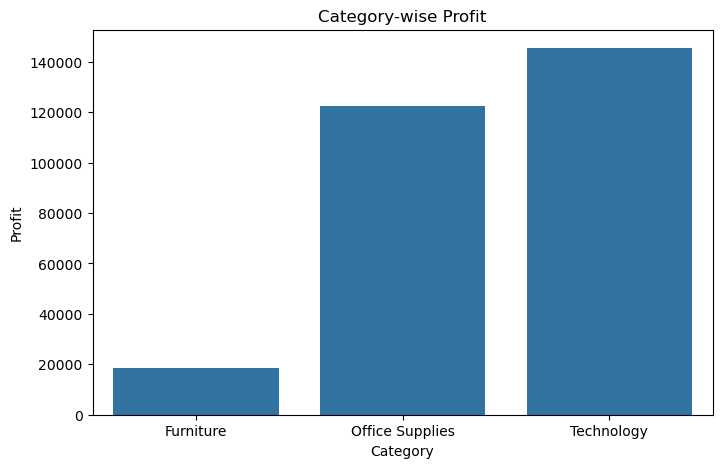

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Category-wise Profit Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=category_summary)
plt.title("Category-wise Profit")
plt.show()


In [26]:
segment_summary = df.groupby('Segment')[['Sales','Profit']].sum().reset_index()
print(segment_summary)


       Segment         Sales       Profit
0     Consumer  1.161401e+06  134119.2092
1    Corporate  7.061464e+05   91979.1340
2  Home Office  4.296531e+05   60298.6785


In [ ]:
 # Conclusion:
#Consumer segment sabse zyada profitable hai
#Business growth ke liye Consumer customers pe focus karna chahiye

In [27]:
region_summary = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
print(region_summary)


    Region        Sales       Profit
0  Central  501239.8908   39706.3625
1     East  678781.2400   91522.7800
2    South  391721.9050   46749.4303
3     West  725457.8245  108418.4489


In [ ]:
#Conclusion:
# West region best performing region hai
# Central & South region me improvement ki zarurat hai

In [28]:
returned_summary = df[df['Returned']==True].groupby('Category')[['Sales','Profit']].sum().reset_index()
print(returned_summary)


          Category       Sales      Profit
0        Furniture  59219.1749   2341.1187
1  Office Supplies  48576.9290   6893.8960
2       Technology  72708.1740  13997.3468


In [ ]:
#Conclusion:
# Returns hone ke baad bhi Technology profitable hai
# Furniture me returns + low margin = risk area

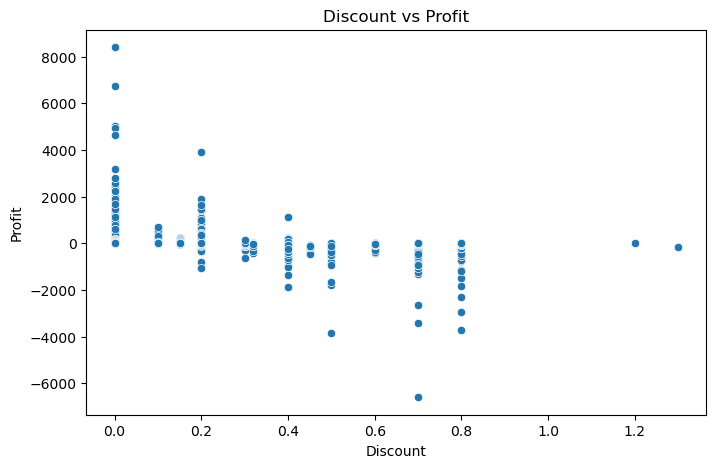

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()


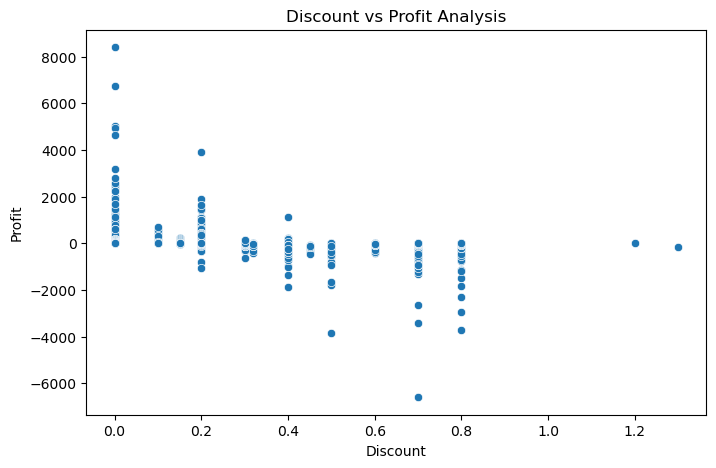

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit Analysis")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


In [31]:
df.groupby('Discount')['Profit'].mean()


Discount
0.00     66.900292
0.10     96.055074
0.15     27.288298
0.20     24.703230
0.30    -45.247108
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -101.796797
1.20     22.298000
1.30   -143.431000
Name: Profit, dtype: float64

In [32]:
# Year-wise trend
yearly_trend = df.groupby('Year')[['Sales','Profit']].sum().reset_index()
print(yearly_trend)


   Year        Sales      Profit
0  2014  484247.4981  49543.9741
1  2015  470532.5090  61618.6037
2  2016  609205.5980  81795.1743
3  2017  733215.2552  93439.2696


In [33]:
# Monthly trend
monthly_trend = df.groupby('Month')[['Sales','Profit']].sum().reset_index()
print(monthly_trend)


    Month        Sales      Profit
0       1   94924.8356   9134.4461
1       2   59751.2514  10294.6107
2       3  205005.4888  28594.6872
3       4  137762.1286  11587.4363
4       5  155028.8117  22411.3078
5       6  152718.6793  21285.7954
6       7  147238.0970  13832.6648
7       8  159044.0630  21776.9384
8       9  307649.9457  36857.4753
9      10  200322.9847  31784.0413
10     11  352461.0710  35468.4265
11     12  325293.5035  43369.1919


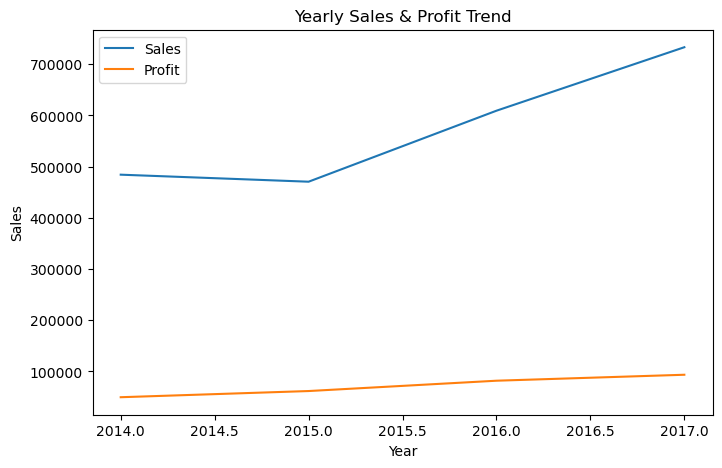

In [34]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Sales', data=yearly_trend, label='Sales')
sns.lineplot(x='Year', y='Profit', data=yearly_trend, label='Profit')
plt.title("Yearly Sales & Profit Trend")
plt.show()


In [1]:
pip install mysql-connector-python sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

df = pd.read_csv('dataset_Superstore.csv')

username = "root"
password = quote_plus("")   # 🔥 password encoded
host = "localhost"
port = "3306"
database = "super_store_db"

engine = create_engine(
    f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}"
)
# Step 2: Load DataFrame into MySQL
table_name = "superstore"

df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")


Data successfully loaded into table 'superstore' in database 'super_store_db'.
